# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [ ]:
# Ví dụ dữ liệu Nominal và Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định
# Ordinal
# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1.1. Check Data null

**We have to check all the value which is null value:**
- what is the name of columns
- how many time we have null value
- what is mode of ***Elements of Structured Data***

In [6]:
titanic.isnull().sum() 
#python count=1 if True else count=0 -->sum of all count+=1 (HOW IT WORKS)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**<h2>So you can see that:</h2>** 
- we have age: 177 null 
- we have embark_town 2 null
- ưe have deck 688 null 
- Our task now: how to fulfill data for this null using EDA also

## 1.2. Null Processing

|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|age|deck|
|isnull.sum()|2|177|688|


### Database.embark_town.isnull() processing

In [50]:
titanic['embark_town'].isnull().sum()
#check howmany value isnull

0

In [51]:
titanic['embark_town'].mode() #check mode

0    Southampton
dtype: object

In [52]:
titanic.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [47]:
titanic.embark_town.value_counts(dropna= False)
#Note that value_counts always igrone the NaN value therefore we have to choice dropna = False

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [11]:
filter1 = titanic['embark_town'].isnull()
titanic[filter1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [18]:
titanic.embark_town.fillna('Unknown')  #fulfill as Unknown value

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [19]:
#YOu can see that we have: same fare and same calss also same who in this embark_town
f1 = titanic.who == 'woman'
f2 = titanic['class'] == 'First'
f3 = titanic.fare == 80

In [27]:
ser = titanic[f1 & f2 &f3]
ser
#We have to reduce the filters to find what is serials which can help to fullfil that null value

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [28]:
ser = titanic['embark_town'][f1 & f2]
ser

1        Cherbourg
3      Southampton
11     Southampton
31       Cherbourg
52       Cherbourg
          ...     
856    Southampton
862    Southampton
871    Southampton
879      Cherbourg
887    Southampton
Name: embark_town, Length: 91, dtype: object

In [29]:
ser = titanic[f1 & f2]
ser.embark_town.value_counts()

Southampton    45
Cherbourg      43
Queenstown      1
Name: embark_town, dtype: int64

In [30]:
ser.embark_town.value_counts().max()

45

In [31]:
ser.embark_town.value_counts().idxmax()

'Southampton'

In [32]:
titanic['embark_town'].fillna(ser.embark_town.value_counts().idxmax()) #fill however the titanic still did not update

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [33]:
titanic['embark_town'] = titanic['embark_town'].fillna(ser.embark_town.value_counts().idxmax()) #update tittanic

In [34]:
titanic.embark_town.value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [41]:
titanic['embark_town'].value_counts(dropna = False) #confrim all value.isvalue = False is done now

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

### Database.deck.isnull() processing

|||**Database.isnull().sum()**||
|-|-|-|-|
|columns|embark_town|age|**deck**|
|isnull.sum()|2|177|**688**|


In [59]:
titanic['deck'].isnull().sum() #python count=1 if True else count=0 -->sum of all count+=1
#Check how many value isnull

688

In [60]:
titanic['deck'].value_counts(dropna= False)
#Show more details about null value

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [61]:
titanic['deck'].mode()
#Check mode of deck: Elements of Structured Data

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**Note that: The Elements of Structured Data is Category**

In [62]:
#Note that data is category: abcdefg 
#when you fullfill you have to fill the value in list of (abcdefg)
#We have to add more an category
#pandas cotegorical

In [63]:
titanic['deck'].cat.add_categories('Unknown')
#We wanna set unknown value firtly as defaults and then we will process later

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [64]:
titanic['deck']= titanic['deck'].cat.add_categories('Unknown')#update the Unknow in categorical elements of ESD

In [65]:
#Check ESD now
titanic['deck'].mode()

0    C
Name: deck, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [67]:
titanic['deck'].fillna('Unknown')
# fulfilling all Unknown value into the deck which we have isnull elements

0      Unknown
1            C
2      Unknown
3            C
4      Unknown
        ...   
886    Unknown
887          B
888    Unknown
889          C
890    Unknown
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [68]:
titanic['deck']= titanic['deck'].fillna('Unknown') 
#Update titanic after fullfiling deck

In [69]:
titanic['deck'].isnull().sum() #OK

0

**Because the EDA of deck is catergory therefore it is quite hard to process to find the fulfill value for isnull value**
[pandascategory](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

## 1.3 Special case: fillna for age:

|||Database.isnull().sum()||
|-|-|-|-|
|columns|embark_town|**age**|deck|
|isnull.sum()|2|**177**|688|

In [77]:
titanic['age'].isnull().sum()
#177 value

177

In [79]:
titanic['age'].value_counts(dropna= False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
0.42       1
34.50      1
66.00      1
14.50      1
0.92       1
Name: age, Length: 89, dtype: int64

In [80]:
#Check mode ESD
titanic['age'].mode()

0    24.0
dtype: float64

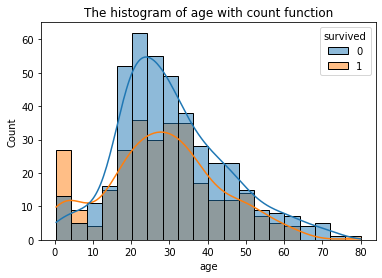

In [83]:
sns.histplot(titanic, x='age', kde=True,hue = 'survived')
plt.title('The histogram of age with count function');

In [84]:
titanic['age'].isnull().sum()/len(titanic['age'])#20% quite big actually therefore you can not remove them 

0.19865319865319866

<AxesSubplot:xlabel='age', ylabel='fare'>

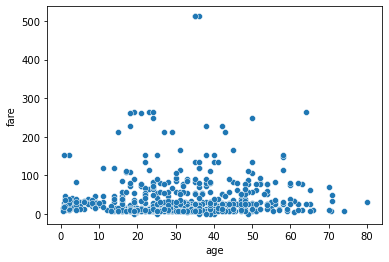

In [85]:
sns.scatterplot(data= titanic, x='age', y= 'fare')

<AxesSubplot:>

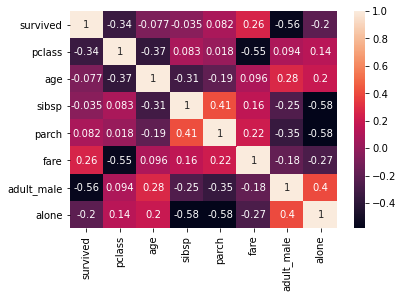

In [86]:
sns.heatmap(titanic.corr(), annot=True)

In [87]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [88]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [89]:
titanic['parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

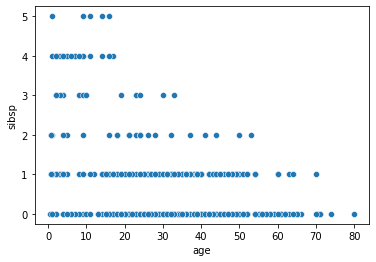

In [57]:
sns.scatterplot(data= titanic, x='age', y='sibsp')

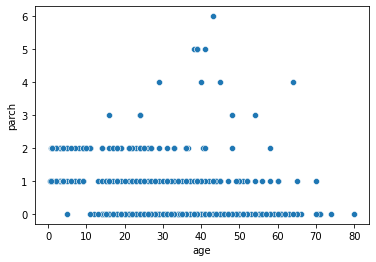

In [58]:
sns.scatterplot(data= titanic, x='age', y='parch')

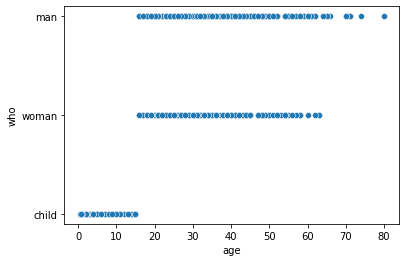

In [59]:
sns.scatterplot(data= titanic, x='age', y='who')

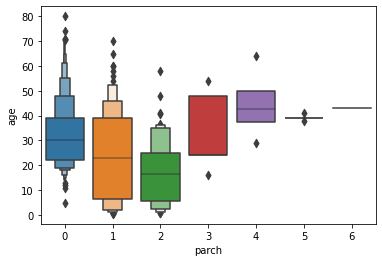

In [61]:
sns.boxenplot(data= titanic, x = 'parch', y = 'age')

In [66]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x)*100)

who    sibsp  parch
child  0      0          0.000000
              1          0.000000
              2          0.000000
       1      0          0.000000
              1          0.000000
              2          0.000000
       2      1          0.000000
              2          0.000000
       3      1          0.000000
              2          0.000000
       4      1          0.000000
              2          0.000000
       5      2          0.000000
man    0      0         26.097561
              1          0.000000
              2          0.000000
       1      0         11.864407
              1          9.523810
              2         20.000000
              3          0.000000
              4          0.000000
              5          0.000000
       2      0         15.384615
              1          0.000000
       3      1        100.000000
              2          0.000000
       4      1          0.000000
       8      2        100.000000
woman  0      0         21.4

In [ ]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: (x.isnull().sum())/len(x))

In [69]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

In [68]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))# điền các gía trị bị thiếu bằng giá trị trung bình của nhóm

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [70]:
titanic['age'] = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [72]:
titanic['age'].isnull().sum()# Chia nhỏ quá thì bây h chia to hơn tí để điều được dữ liệu thiếu vào

11

In [73]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390    0.000000
      1       38.0  29.647276    0.000000
      2       29.0  21.597586    0.000000
      3        1.0  24.000000    0.000000
      4        1.0  29.000000    0.000000
      5        2.0  40.000000    0.000000
1     0      123.0  32.251148    0.000000
      1       57.0  27.525439    0.000000
      2       19.0  21.579123    0.000000
      3        3.0  39.333333    0.000000
      4        3.0  49.666667    0.000000
      5        3.0  38.666667    0.000000
      6        1.0  43.000000    0.000000
2     0       16.0  31.991477    0.000000
      1        7.0   8.357143    0.000000
      2        4.0  17.250000    0.000000
      3        1.0  24.000000    0.000000
3     0        2.0  31.500000    0.000000
      1        7.0   4.333333    0.571429
      2        7.0  13.000000    0.000000
4     1        9.0   6.777778    0.000000
      2        9.0   7.333333    0.000000
5     2        5.0  10.200000    0.000000
8     2        7.0        NaN    1.000000

In [74]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
titanic['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [75]:
titanic['age'].isnull().sum() 

7

In [76]:
titanic['age'] = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))

In [77]:
titanic['age'].isnull().sum() 

7

In [78]:
titanic.age.isnull().sum()

7

In [86]:
titanic[titanic['who'] == 'child']['age'].mean()/5 # do khar nawng song sot tre em cao hon nen buoc phai save thay vi bo di

6.026432670613273

In [87]:
titanic['age'] = titanic['age'].fillna(titanic[titanic['who'] == 'child']['age'].mean()/5)

In [88]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

In [ ]:
# Tao bien bang cach chia bin du lieu

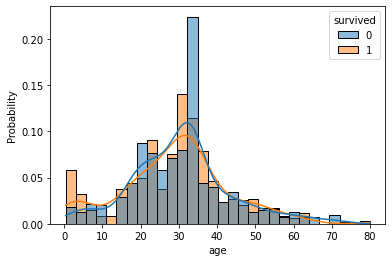

In [91]:
sns.histplot(data= titanic, x= 'age', hue= 'survived',kde = True, stat='probability',common_norm= False)

In [96]:
age_groups = [0,15,25,35,45,60,80,100]

In [97]:
pd.cut(titanic['age'], bins= age_groups)

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] <
                                  (80, 100]]

In [98]:
titanic['age_groups'] = pd.cut(titanic['age'], bins= age_groups) # Học lại bài phân nhóm

In [99]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups
0,0,3,male,22.000000,1,0,7.2500,S,Third,child,True,Unknown,Southampton,no,False,"(15, 25]"
1,1,1,female,38.000000,1,0,71.2833,C,First,child,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.000000,0,0,7.9250,S,Third,child,False,Unknown,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.000000,1,0,53.1000,S,First,child,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.000000,0,0,8.0500,S,Third,child,True,Unknown,Southampton,no,True,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,child,True,Unknown,Southampton,no,True,"(25, 35]"
887,1,1,female,19.000000,0,0,30.0000,S,First,child,False,B,Southampton,yes,True,"(15, 25]"
888,0,3,female,31.333333,1,2,23.4500,S,Third,child,False,Unknown,Southampton,no,False,"(25, 35]"
889,1,1,male,26.000000,0,0,30.0000,C,First,child,True,C,Cherbourg,yes,True,"(25, 35]"


In [ ]:
# Tao bien bang bien chi bao (female & first class)

In [ ]:
#adult_male

In [100]:
f1 = titanic['sex'] == 'female'
f2 = titanic['pclass'] < 3
f1 & f2

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [101]:
titanic ['female_from_2nd_class'] = (f1 & f2)

In [105]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_groups,female_from_2nd_class
0,0,3,male,22.000000,1,0,7.2500,S,Third,child,True,Unknown,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.000000,1,0,71.2833,C,First,child,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.000000,0,0,7.9250,S,Third,child,False,Unknown,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.000000,1,0,53.1000,S,First,child,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.000000,0,0,8.0500,S,Third,child,True,Unknown,Southampton,no,True,"(25, 35]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,child,True,Unknown,Southampton,no,True,"(25, 35]",False
887,1,1,female,19.000000,0,0,30.0000,S,First,child,False,B,Southampton,yes,True,"(15, 25]",True
888,0,3,female,31.333333,1,2,23.4500,S,Third,child,False,Unknown,Southampton,no,False,"(25, 35]",False
889,1,1,male,26.000000,0,0,30.0000,C,First,child,True,C,Cherbourg,yes,True,"(25, 35]",False


In [ ]:
# Tao bien bang tinh z-score (bien doi phan phoi)

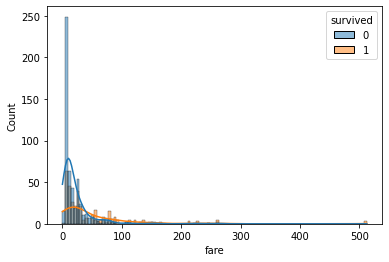

In [107]:
sns.histplot(data = titanic, x= 'fare', kde = True, hue = 'survived')

In [114]:
titanic.hist(np.sqrt(titanic['fare']))

KeyError: ignored

In [119]:
ser = np.log(titanic['fare'].where(titanic['fare'] > 0, 1)) # note log 1 = 0

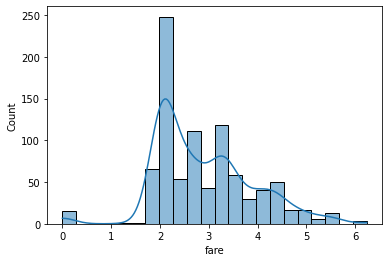

In [118]:
sns.histplot(np.log(titanic['fare'].where(titanic['fare'] > 0, 1)), kde =True)

In [ ]:
# tinh Z score

In [120]:
ser.mean(), ser.std()

(2.893846237920027, 1.0028989322884627)

In [122]:
new_ser = (ser - ser.mean())/ser.std()

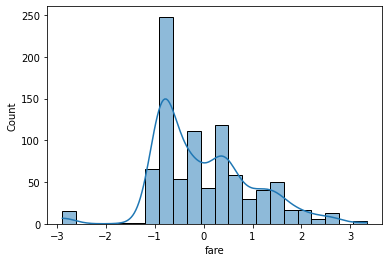

In [123]:
sns.histplot(new_ser, kde = True)

In [124]:
# move up to standard value (normal distribution) chuyển trọng tâm ấy mà

In [ ]:
## Data Sampling

In [ ]:
# Tinh ti le survived

In [ ]:
# Random sampling

In [ ]:
# Sampling vs Bootstrap

In [ ]:
# Sampling bang scikit learn